In [1]:
print("This is for Jack's rough code")

This is for Jack's rough code


In [115]:
#libraries
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl as cmpl
import matplotlib.patches as mpatches

In [3]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,ROYAL HOSPITAL,40,40,0,Open
1,2,2018-08-01 12:35:02,ROYAL HOSPITAL,40,40,0,Open
2,3,2018-08-01 12:40:02,ROYAL HOSPITAL,40,40,0,Open
3,4,2018-08-01 12:45:02,ROYAL HOSPITAL,40,40,0,Open
4,5,2018-08-01 12:50:02,ROYAL HOSPITAL,40,40,0,Open


In [4]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,DATE,BIKE.USAGE
0,1,2018-08-01 12:30:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
1,2,2018-08-01 12:35:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
2,3,2018-08-01 12:40:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
3,4,2018-08-01 12:45:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
4,5,2018-08-01 12:50:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0


In [5]:
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]
dataMS = data[data.NAME == "MERRION SQUARE SOUTH"]
dataRH = data[data.NAME == "ROYAL HOSPITAL"]
print(len(dataPR))
print(len(dataMS))
print(len(dataRH))


342924
337762
342975


In [63]:
weekly_avg = data.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
date_vector = pd.DatetimeIndex(data["DATE"].dt.date)

PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

MS_weekly_avg = dataMS.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
MS_date_vector = pd.DatetimeIndex(dataMS["DATE"].dt.date)

RH_weekly_avg = dataRH.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
RH_date_vector = pd.DatetimeIndex(dataRH["DATE"].dt.date)

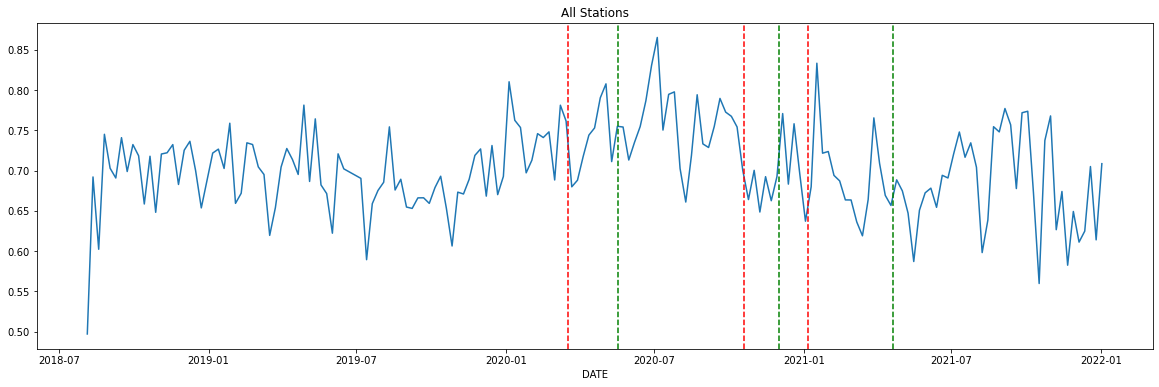

In [68]:
fig, axes = plt.subplots(figsize=(20,6))
sns.lineplot(x = weekly_avg.index, y = weekly_avg.values).set_title('Weekly Average Bike Usage')
plt.axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')

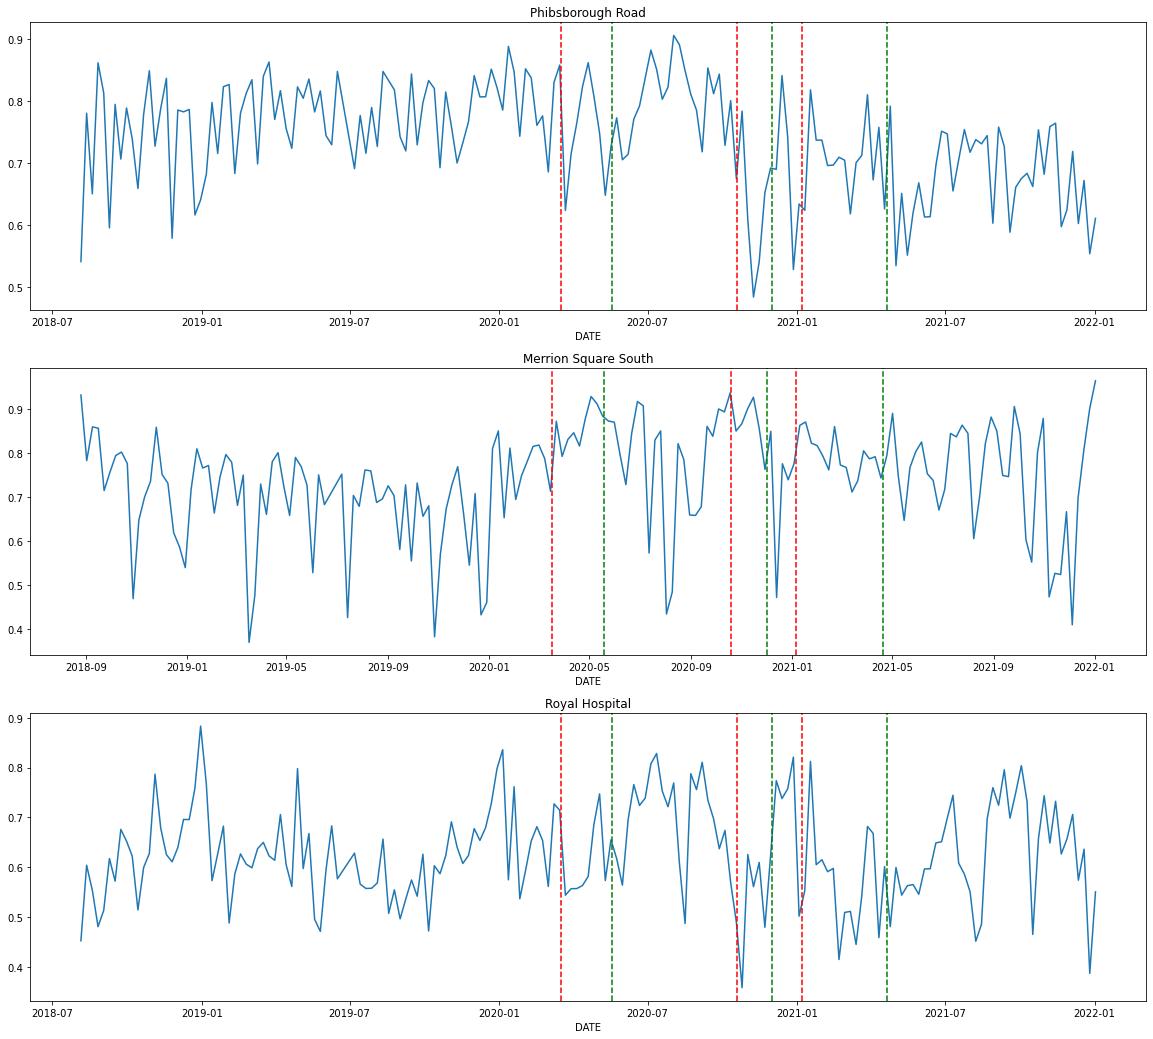

In [62]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = PR_weekly_avg.index, y = PR_weekly_avg.values)
axes[0].set_title('Phibsborough Road')
axes[0].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[1],x = MS_weekly_avg.index, y = MS_weekly_avg.values)
axes[1].set_title('Merrion Square South')
axes[1].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[2],x = RH_weekly_avg.index, y = RH_weekly_avg.values)
axes[2].set_title("Royal Hospital")
axes[2].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')


In [35]:
dictRH = {'week': range(179), 'avg': RH_weekly_avg.values}
regressionRH = pd.DataFrame(data=dictRH)
regressionRH = regressionRH.dropna()

<AxesSubplot:xlabel='week', ylabel='avg'>

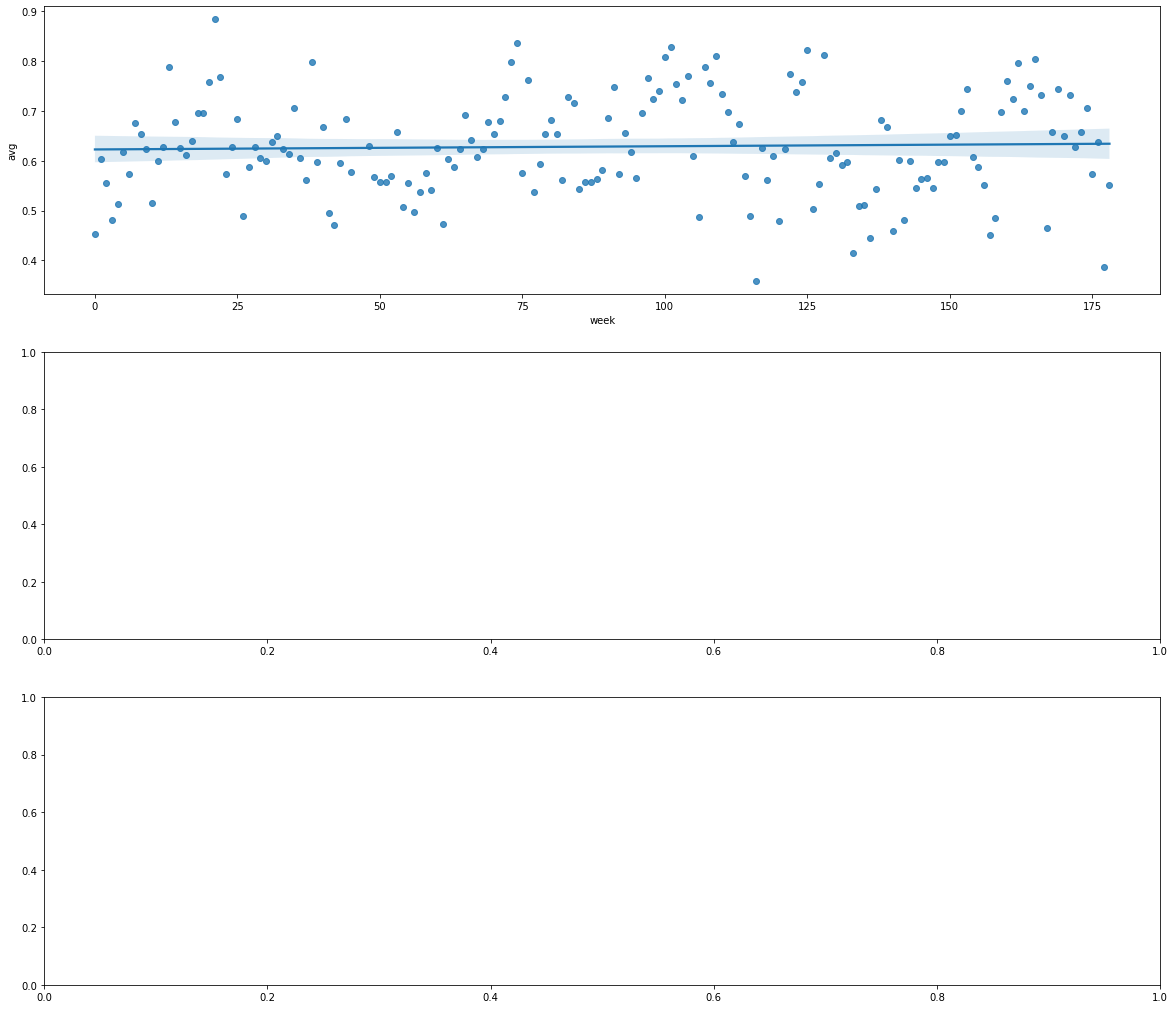

In [41]:
RHd_train, RHd_test, RHa_train, RHa_test = train_test_split(regressionRH.week, regressionRH.avg, test_size=0.2, random_state=42)

RHa_train_arr = RHa_train.array
RHa_test_arr = RHa_test.array
RHd_train_arr = RHd_train.array.to_numpy().reshape(-1,1)
RHd_test_arr = RHd_test.array.to_numpy().reshape(-1,1)


RHa_train_arr

RHreg = LinearRegression().fit(RHd_train_arr,RHa_train_arr)

fitted_RHtrain_avg = RHreg.predict(RHd_train_arr)
fitted_RHtest_avg = RHreg.predict(RHd_test_arr)

#Visualisation


In [57]:
len(MSdata_post_pandemic)
(81+95)

176

<AxesSubplot:xlabel='week', ylabel='avg'>

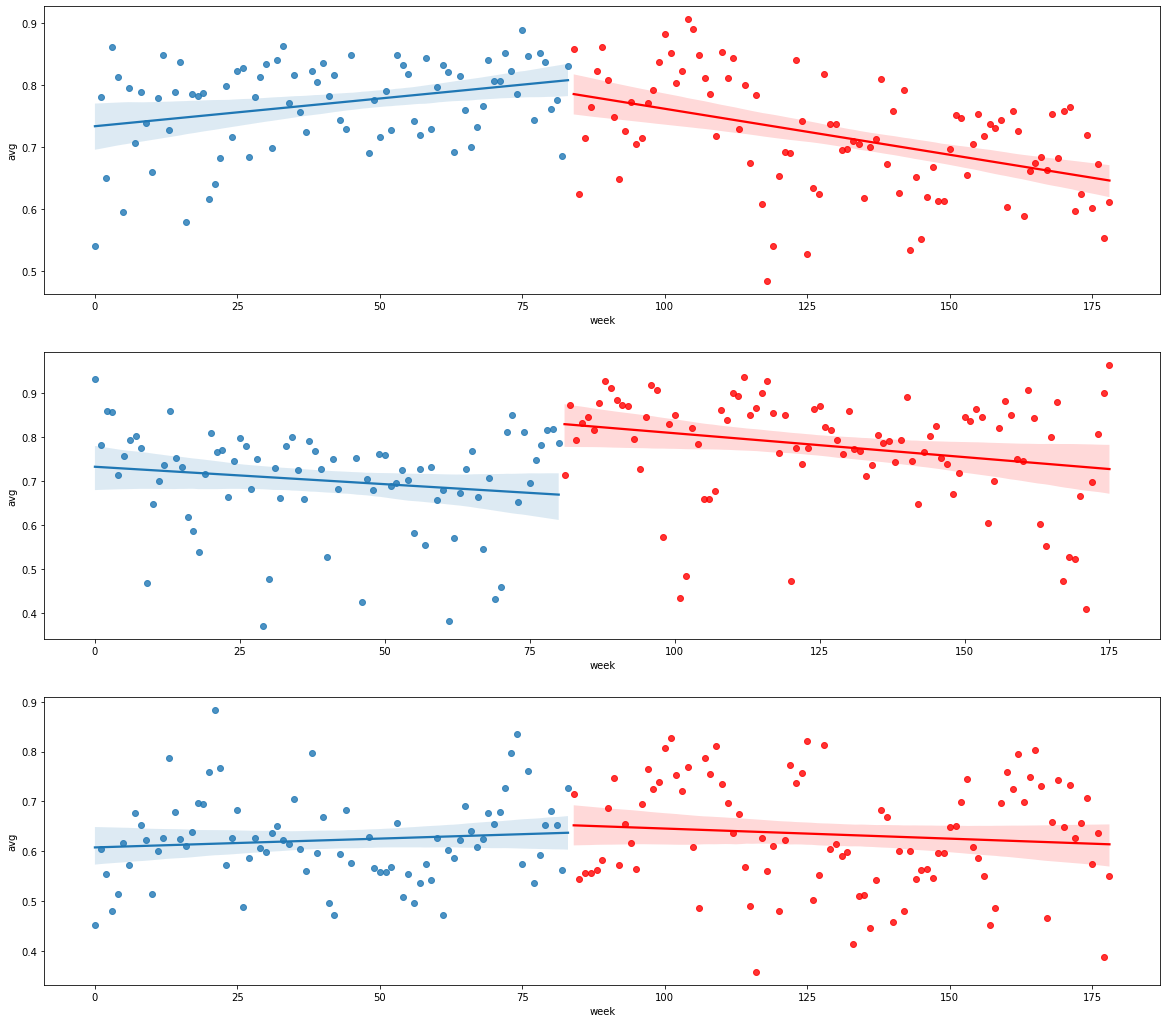

In [60]:
PRdata_pre_pandemic = PR_weekly_avg[PR_weekly_avg.index < '2020-03-15']
dictPRpre = {'week': range(84), 'avg': PRdata_pre_pandemic.values}
regressionPRpre = pd.DataFrame(data=dictPRpre)
regressionPRpre = regressionPRpre.dropna()
PRdata_post_pandemic = PR_weekly_avg[PR_weekly_avg.index >= '2020-03-15']
dictPRpost = {'week': range(84, 179), 'avg': PRdata_post_pandemic.values}
regressionPRpost = pd.DataFrame(data=dictPRpost)
regressionPRpost = regressionPRpost.dropna()



MSdata_pre_pandemic = MS_weekly_avg[MS_weekly_avg.index < '2020-03-15']
dictMSpre = {'week': range(81), 'avg': MSdata_pre_pandemic.values}
regressionMSpre = pd.DataFrame(data=dictMSpre)
regressionMSpre = regressionMSpre.dropna()
MSdata_post_pandemic = MS_weekly_avg[MS_weekly_avg.index >= '2020-03-15']
dictMSpost = {'week': range(81, 176), 'avg': MSdata_post_pandemic.values}
regressionMSpost = pd.DataFrame(data=dictMSpost)
regressionMSpost = regressionMSpost.dropna()


RHdata_pre_pandemic = RH_weekly_avg[RH_weekly_avg.index < '2020-03-15']
dictRHpre = {'week': range(84), 'avg': RHdata_pre_pandemic.values}
regressionRHpre = pd.DataFrame(data=dictRHpre)
regressionRHpre = regressionRHpre.dropna()
RHdata_post_pandemic = RH_weekly_avg[RH_weekly_avg.index >= '2020-03-15']
dictRHpost = {'week': range(84, 179), 'avg': RHdata_post_pandemic.values}
regressionRHpost = pd.DataFrame(data=dictRHpost)
regressionRHpost = regressionRHpost.dropna()

regFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.regplot(ax=axes[0], x=regressionPRpre.week,y= regressionPRpre.avg)
sns.regplot(ax=axes[0], x=regressionPRpost.week,y= regressionPRpost.avg, color = 'red')
sns.regplot(ax=axes[1], x=regressionMSpre.week,y= regressionMSpre.avg)
sns.regplot(ax=axes[1], x=regressionMSpost.week,y= regressionMSpost.avg, color = 'red')
sns.regplot(ax=axes[2], x=regressionRHpre.week,y= regressionRHpre.avg)
sns.regplot(ax=axes[2], x=regressionRHpost.week,y= regressionRHpost.avg, color = 'red')

In [50]:
len(PRdata_pre_pandemic)

84

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[53.35604136 -6.27203773]
 [53.34108627 -6.24685977]
 [53.34365711 -6.29759778]]


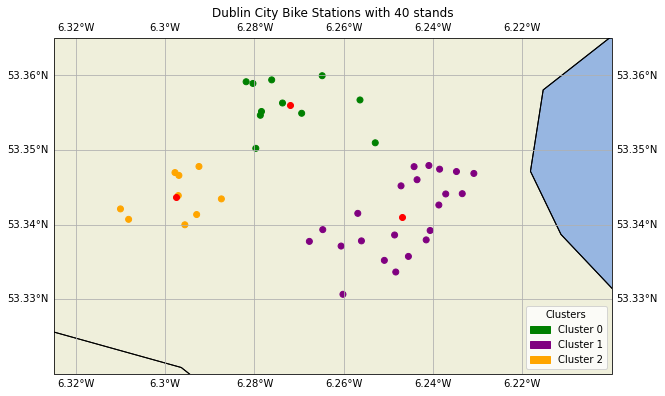

In [118]:
# Choose stations using K-means clustering 

# Import station coordinates (pre-wrangled in R)
df = pd.read_csv("data/stations.csv")

# Filter the dataframe to include only bike stands = 40
df = df[df['BIKE.STANDS'] == 40]

# Create a subset of the dataset containing only the latitude and longitude columns
X = df[['LATITUDE', 'LONGITUDE']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)

# Add the cluster labels to the dataframe
df['CLUSTER'] = kmeans.labels_

# Print the centroids of each cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)


# Create a scatter plot of the data points colored by cluster
proj = ccrs.Mercator()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
x0, y0 = -6.27203773, 53.35604136
ax.plot(x0, y0, 'ro', transform=ccrs.PlateCarree())
x1, y1 = -6.24685977, 53.34108627
ax.plot(x1, y1, 'ro', transform=ccrs.PlateCarree())
x2, y2 = -6.29759778, 53.34365711
ax.plot(x2, y2, 'ro', transform=ccrs.PlateCarree())
colours = {0:'green', 1:'purple', 2:'orange'}
ax.scatter(df['LONGITUDE'], df['LATITUDE'], c = df['CLUSTER'].map(colours),transform=ccrs.PlateCarree())
ax.set_extent([-6.325, -6.2, 53.32, 53.365], crs=ccrs.PlateCarree())
ax.set_title('Map of Dublin City bike stations with 40 stands')
ax.gridlines(draw_labels=True)
ax.legend(loc='lower right', frameon=True, title='Clusters')
patches = [mpatches.Patch(color=color, label=f'Cluster {cluster}')
           for cluster, color in colours.items()]
ax.legend(handles=patches, loc='lower right', frameon=True, title='Clusters')

In [139]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
print(len(data_pre_pandemic))
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
print(len(data_post_pandemic))

84
95


/Users/jack/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


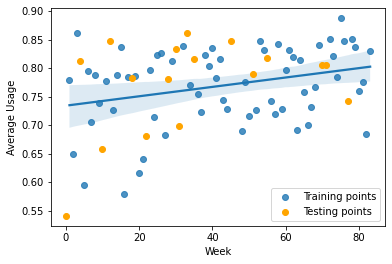

In [137]:

#Linear regression pre pan visualisation
sns.regplot(prePRavg_train_arr, prePRweek_train_arr, label='Training points')
plt.scatter(prePRavg_test_arr, prePRweek_test_arr, label='Testing points', color = 'orange')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Usage')
plt.show()

In [140]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
dictpre = {'week': range(84), 'avg': data_pre_pandemic.values}
regressionpre = pd.DataFrame(data=dictpre)
regressionpre = regressionpre.dropna()
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
dictpost = {'week': range(84, 179), 'avg': data_post_pandemic.values}
regressionpost = pd.DataFrame(data=dictpost)
regressionpost = regressionpost.dropna()

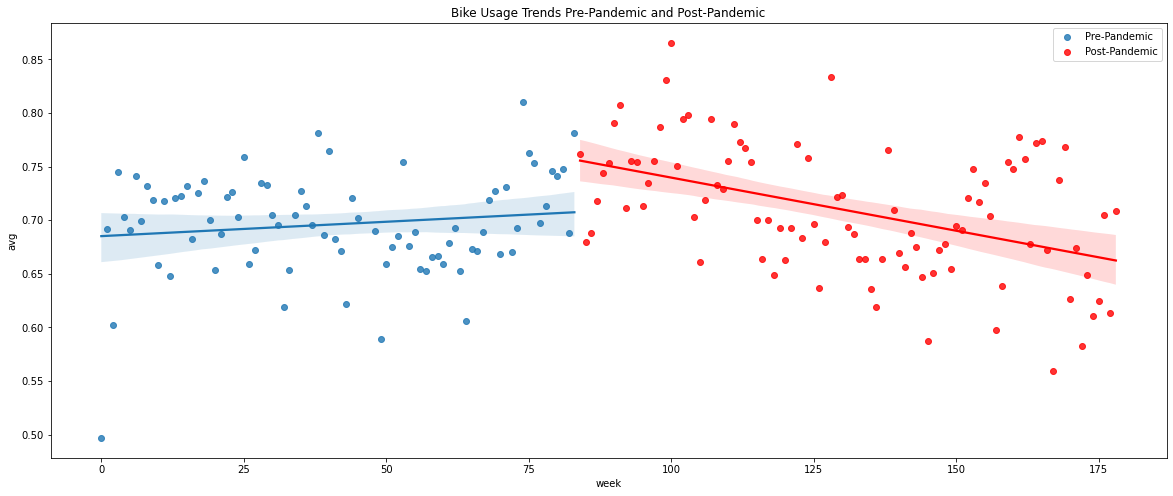

In [163]:
regFig, axes = plt.subplots(figsize=(20,8))
sns.regplot(x=regressionpre.week,y= regressionpre.avg, label = 'Pre-Pandemic')
sns.regplot(x=regressionpost.week,y= regressionpost.avg, color = 'red', label = 'Post-Pandemic').set_title('Bike Usage Trends Pre-Pandemic and Post-Pandemic')
plt.legend()

In [156]:
preweek_arr = regressionpre.week.to_numpy().reshape(-1,1)
preavg_arr = regressionpre.avg.to_numpy().reshape(-1,1)
pre_reg = LinearRegression().fit(preweek_arr,preavg_arr)


print("Pre-Pandemic Intercept:", pre_reg.intercept_)
print("Pre-Pandemic Coefficient:", pre_reg.coef_[0])

postweek_arr = regressionpost.week.to_numpy().reshape(-1,1)
postavg_arr = regressionpost.avg.to_numpy().reshape(-1,1)
post_reg = LinearRegression().fit(postweek_arr,postavg_arr)


print("Post-Pandemic Intercept:", post_reg.intercept_)
print("Post-Pandemic Coefficient:", post_reg.coef_[0])

Pre-Pandemic Intercept: [0.68513153]
Pre-Pandemic Coefficient: [0.00026794]
Post-Pandemic Intercept: [0.8387338]
Post-Pandemic Coefficient: [-0.00099054]


Text(0, 0.5, 'Average Weekly Bike Usage')

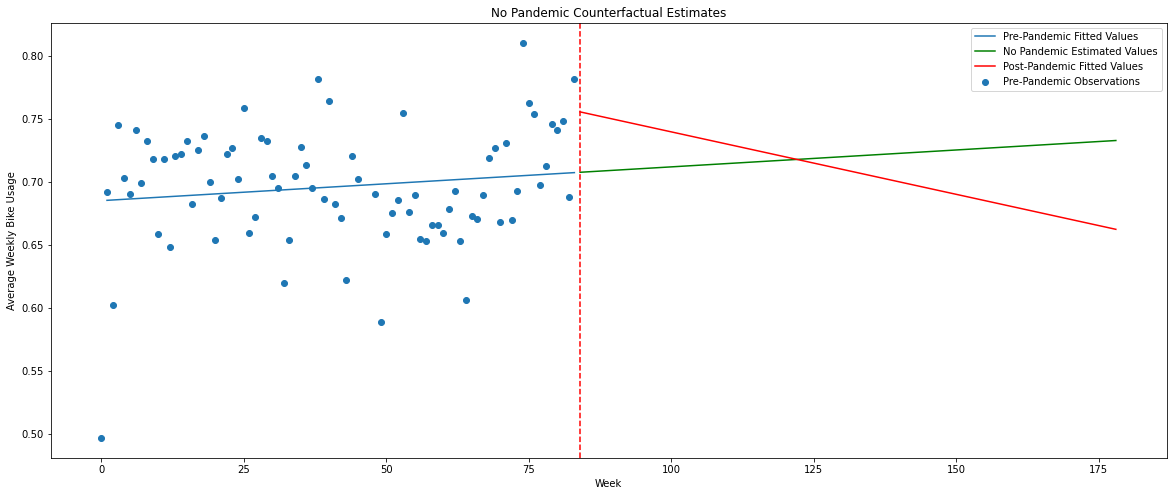

In [191]:

fc1 = np.array(range(1,84))
fc1_pred = pre_reg.predict(fc1.reshape(-1,1))
fc2 = np.array(range(84,179))
fc2_pred = pre_reg.predict(fc2.reshape(-1,1))

postfc = np.array(range(84, 179))
post_pred = post_reg.predict(postfc.reshape(-1,1))

predFig, axes = plt.subplots(figsize=(20,8))
plt.plot(fc1, fc1_pred, label = 'Pre-Pandemic Fitted Values')
plt.plot(fc2, fc2_pred, color = 'green', label = 'No Pandemic Estimated Values')
plt.plot(postfc, post_pred, color = 'red', label = 'Post-Pandemic Fitted Values')
dictmain = {'week': range(179), 'avg': weekly_avg.values}
plt.axvline(84, color='red', linestyle='--')
pred_df = pd.DataFrame(data=dictmain)
plt.scatter(regressionpre.week, regressionpre.avg, label = 'Pre-Pandemic Observations')
plt.legend()
plt.title('No Pandemic Counterfactual Estimates')
plt.xlabel('Week')
plt.ylabel('Average Weekly Bike Usage')